In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler , StandardScaler

In [3]:
df = pd.read_csv('J:/Data science/data/Indian Liver Patient Dataset (ILPD).csv')

In [4]:
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
df.isna().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

In [6]:
df.fillna(df['alkphos'].mean() , inplace=True)

In [7]:
df.isna().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64

In [8]:
# df['gender'] = df['gender'].apply(lambda x:1 if x == 'Male' else 0)

In [9]:
X = df.drop(['gender' , 'is_patient'] , axis=1)

In [10]:
X.head()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40


In [11]:
y = df['is_patient']

In [12]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: is_patient, dtype: int64

In [13]:
scaler = StandardScaler()

In [14]:
X=scaler.fit_transform(X)

In [15]:
X

array([[ 1.25209764, -0.41887783, -0.49396398, ...,  0.29211961,
         0.19896867, -0.14789798],
       [ 1.06663704,  1.22517135,  1.43042334, ...,  0.93756634,
         0.07315659, -0.65069686],
       [ 1.06663704,  0.6449187 ,  0.93150811, ...,  0.47653296,
         0.19896867, -0.17932291],
       ...,
       [ 0.44843504, -0.4027597 , -0.45832717, ..., -0.0767071 ,
         0.07315659,  0.16635131],
       [-0.84978917, -0.32216906, -0.35141677, ...,  0.29211961,
         0.32478075,  0.16635131],
       [-0.41704777, -0.37052344, -0.42269037, ...,  0.75315299,
         1.58290153,  1.73759779]])

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [17]:
x_test[:3]

array([[ 1.25209764, -0.37052344, -0.42269037, -0.36491779, -0.29985997,
        -0.33571411, -1.09098054, -0.68171587, -0.14789798],
       [ 0.81935624, -0.25769654, -0.24450636,  6.61404301, -0.10804096,
        -0.09322322,  1.39859973,  0.95384114,  0.00922666],
       [ 1.74665924, -0.22546028, -0.28014316,  6.01255052,  0.1166613 ,
         0.1076978 , -0.90656719, -1.43658834, -1.40489517]])

In [18]:
model_logi = LogisticRegression(C=7)

In [19]:
model_logi.fit(x_train,y_train)

LogisticRegression(C=7)

In [20]:
y_pred_logi = model_logi.predict(x_test)

In [21]:
y_pred_logi

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2],
      dtype=int64)

In [22]:
acc_logi = accuracy_score(y_test,y_pred_logi)
acc_logi

0.6818181818181818

In [23]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [24]:
conf_logi = confusion_matrix(y_pred_logi,y_test)
conf_logi

array([[52, 19],
       [ 9,  8]], dtype=int64)

C:\Users\Abdelrahman\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


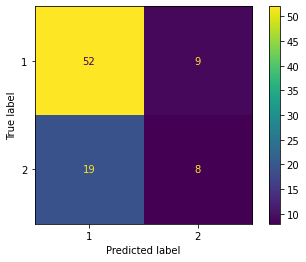

In [25]:
plot_con_logi = plot_confusion_matrix(model_logi,x_test,y_test)
plot_con_logi;

In [26]:
model_dt = DecisionTreeClassifier(min_samples_leaf=0.13)

In [27]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=0.13)

In [28]:
y_pred_dt = model_dt.predict(x_test)
y_pred_dt

array([2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2],
      dtype=int64)

C:\Users\Abdelrahman\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


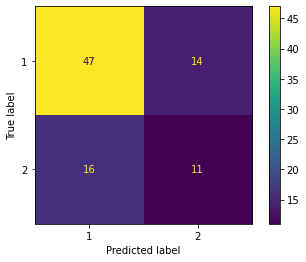

In [29]:
plot_con = plot_confusion_matrix(model_dt,x_test,y_test)
plot_con;

In [30]:
acc_dt = accuracy_score(y_test,y_pred_dt)
acc_dt

0.6590909090909091

In [31]:
model_knn = KNeighborsClassifier(n_neighbors=72)

In [32]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=72)

In [33]:
y_pred_knn = model_knn.predict(x_test)

In [34]:
conf_knn = confusion_matrix(y_test,y_pred_knn)
conf_knn

array([[60,  1],
       [26,  1]], dtype=int64)

C:\Users\Abdelrahman\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


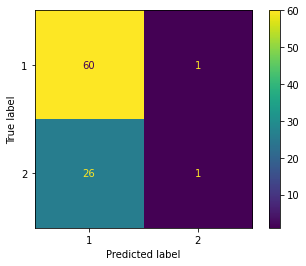

In [35]:
plot_con_knn = plot_confusion_matrix(model_knn,x_test,y_test)
plot_con_knn

In [36]:
acc_knn = accuracy_score(y_test,y_pred_knn)
acc_knn

0.6931818181818182

In [37]:
from sklearn.ensemble import VotingClassifier

In [38]:
model_voting = VotingClassifier([('logistic', model_logi),
                                  ('dt', model_dt),
                                  ('knn', model_knn)] , voting='soft')

In [39]:
model_voting.fit(x_train,y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression(C=7)),
                             ('dt',
                              DecisionTreeClassifier(min_samples_leaf=0.13)),
                             ('knn', KNeighborsClassifier(n_neighbors=72))],
                 voting='soft')

In [40]:
y_pred_voting = model_voting.predict(x_test)

In [41]:
y_pred_voting

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
      dtype=int64)

In [42]:
conf_voting = confusion_matrix(y_test,y_pred_voting)
conf_voting

array([[57,  4],
       [23,  4]], dtype=int64)

C:\Users\Abdelrahman\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


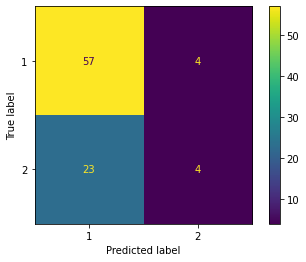

In [43]:
plot_con_voting = plot_confusion_matrix(model_voting , x_test,y_test)
plot_con_voting

In [44]:
acc_voting = accuracy_score(y_test,y_pred_voting)
acc_voting

0.6931818181818182

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
model_rf = RandomForestClassifier(n_estimators=15)

In [47]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=15)

In [48]:
y_pred_rf = model_rf.predict(x_test)

In [49]:
conf_rf = confusion_matrix(y_test,y_pred_rf)
conf_rf

array([[48, 13],
       [12, 15]], dtype=int64)

C:\Users\Abdelrahman\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


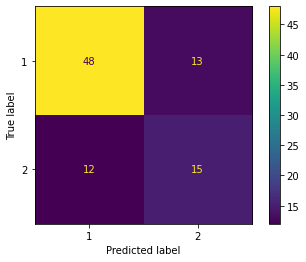

In [50]:
plot_con_rf = plot_confusion_matrix(model_rf,x_test,y_test)
plot_con_rf

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [52]:
dt = DecisionTreeClassifier(random_state=1)

In [53]:
bc= BaggingClassifier(base_estimator=dt , n_estimators=50,oob_score=True)

In [54]:
bc.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  n_estimators=50, oob_score=True)

In [55]:
y_pred_bc = bc.predict(x_test)

In [56]:
acc_bc = accuracy_score(y_test, y_pred_bc)
acc_bc

0.7159090909090909

In [57]:
conf_bc = confusion_matrix(y_test,y_pred_bc)
conf_bc

array([[49, 12],
       [13, 14]], dtype=int64)

In [58]:
acc_oob = bc.oob_score_
acc_bc

0.7159090909090909

In [59]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(x_train, y_train) 

RandomForestRegressor(n_estimators=25, random_state=2)

In [60]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(x_test)

# Evaluate the test set RMSE
import numpy as np
rmse_test = np.sqrt(MSE(y_test,y_pred))

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 0.45


In [61]:
type(x_train)

numpy.ndarray

In [62]:
x_train.shape

(495, 9)

In [63]:
df.columns

Index(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
       'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos', 'is_patient'],
      dtype='object')

In [64]:
rf.feature_importances_ 

array([0.13939824, 0.13855052, 0.08020167, 0.15139652, 0.13671269,
       0.11347442, 0.07658338, 0.09561249, 0.06807008])

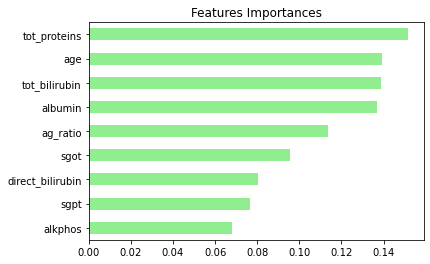

In [65]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_ ,
                        index= ['age', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
       'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos'])

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [66]:
from sklearn.ensemble import AdaBoostClassifier

In [67]:
dt = DecisionTreeClassifier(max_depth=2)

In [68]:
ada = AdaBoostClassifier(base_estimator=dt , n_estimators=180)

In [69]:
ada.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=180)

In [70]:
y_pred_ada = ada.predict(x_test)

In [71]:
acc_ada = accuracy_score(y_test,y_pred_ada)
acc_ada

0.75

In [72]:
# Compute the probabilities of obtaining the positive class
pred_proba = ada.predict_proba(x_test)[:,1]
pred_proba

array([0.52933288, 0.40472893, 0.27231569, 0.37662908, 0.53355245,
       0.47568576, 0.51155982, 0.49784209, 0.36667916, 0.45643655,
       0.47311234, 0.50352857, 0.45220539, 0.42079893, 0.333571  ,
       0.39381782, 0.47548326, 0.57797034, 0.51175548, 0.52717809,
       0.49941264, 0.29668057, 0.46498704, 0.4362781 , 0.44373905,
       0.29437129, 0.26898236, 0.3961855 , 0.47702051, 0.48833197,
       0.50118116, 0.47530139, 0.5105789 , 0.35768273, 0.50207705,
       0.44028646, 0.44360994, 0.31281776, 0.48543181, 0.48160019,
       0.47343858, 0.48602916, 0.52636597, 0.49024392, 0.42871692,
       0.42347433, 0.51024022, 0.38818946, 0.50263492, 0.5231493 ,
       0.57147044, 0.44545716, 0.51351687, 0.52752247, 0.35414608,
       0.51794675, 0.46895976, 0.51876677, 0.49793993, 0.46894318,
       0.46901118, 0.25722963, 0.49943491, 0.35058909, 0.33475027,
       0.3786217 , 0.47101813, 0.52388276, 0.4835352 , 0.39097688,
       0.49856533, 0.30825444, 0.5697627 , 0.46061081, 0.44410

In [73]:
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test,pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.70


In [74]:
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
gb = GradientBoostingClassifier()

In [76]:
gb = GradientBoostingClassifier(max_depth=4, 
            n_estimators=200,
            random_state=2)

In [77]:
# Fit gb to the training set
gb.fit(x_train,y_train)

# Predict test set labels
y_pred_gb = gb.predict(x_test)

In [78]:
y_pred_gb

array([2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2],
      dtype=int64)

In [79]:
acc_db = accuracy_score(y_test,y_pred_gb)
acc_db

0.7954545454545454

[[55  6]
 [12 15]]


C:\Users\Abdelrahman\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


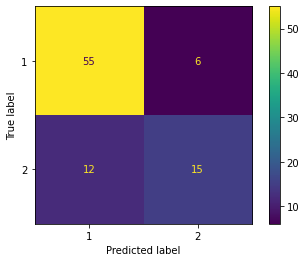

In [80]:
conf_gb = confusion_matrix(y_test,y_pred_gb)
print(conf_gb)
plot_con_gb = plot_confusion_matrix(gb , x_test,y_test)
plot_con_gb;

In [81]:
# Import roc_auc_score from sklearn.metrics 
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

NameError: name 'grid_dt' is not defined

In [82]:
from sklearn.decomposition import PCA

In [83]:
pca = PCA(n_components=2)

In [84]:
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [86]:
explaned_var = pca.explained_variance_
explaned_var

array([2.82350525, 2.07096478])

In [95]:
grad_boost = GradientBoostingClassifier(n_estimators=100)

In [96]:
grad_boost.fit(x_train,y_train)

# Predict test set labels
y_pred_grad_boost = grad_boost.predict(x_test)

In [97]:
from matplotlib.colors import ListedColormap

In [105]:
log = LogisticRegression(C=7)

In [106]:
log.fit(x_train,y_train)
# logis.predict(x_test)

LogisticRegression(C=7)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


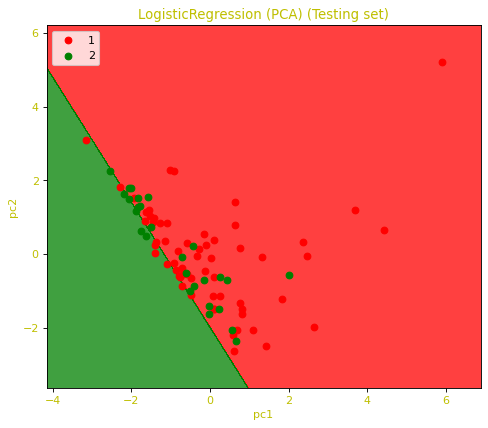

In [107]:
plt.figure(figsize=(7,6),dpi=80)
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, log.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('LogisticRegression (PCA) (Testing set)',color = 'y')
plt.xlabel('pc1',color = 'y')
plt.ylabel('pc2',color = 'y')
plt.xticks(color = 'y')
plt.yticks(color = 'y')
plt.legend()
plt.show();